#### Descrição do Problema 
Um laboratório de Análises Clínicas, que tem como objetivo antecipar os resultados de exames de diabetes por meio da análise de características individuais dos pacientes. Este processo envolverá a coleta de dados provenientes de exames previamente realizados, que incluem informações sobre as características dos pacientes e os resultados obtidos.

Utilizando esses dados, será conduzido o treinamento de um algoritmo supervisionado, com a finalidade de desenvolver um modelo preditivo robusto. Este modelo permitirá a previsão dos resultados de exames de novos pacientes, proporcionando uma abordagem eficaz e personalizada para a avaliação da probabilidade de diabetes.

### Importando Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## Estrutar Conjunto de Dados

### Carregar Dados


In [5]:
# Carregando os dados do dataset "exames_diabetes" em um dataframe
df_exames = pd.read_csv('./datasets/exames_diabetes.csv')

In [6]:
# Visualizar estrutura do dataframe
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [7]:
# Apresentar as 10 primeiras linhas do dataframe
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


### Transformação de Features

In [8]:
# Remover a coluna id_paciente devido a não ser relevante para a análise
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

##### Converter variável categórica em numérica

Em casos de modelos regressivos, é essencial lidar com valores numéricos para garantir uma abordagem apropriada. Em relação à coluna "gênero", substituir seus valores por números não é aconselhável, pois pode sugerir pesos diferentes, distorcendo a interpretação do modelo. 

Para contornar isso, será implementada a técnica de codificação one-hot (one-hot encoding) no código. Essa abordagem envolve a criação de duas variáveis distintas a partir da variável original, mantendo o mesmo grau de importância. Essa estratégia visa preservar a precisão do modelo, evitando interpretações equivocadas sobre relações hierárquicas ou diferenças de peso entre as categorias.

In [9]:
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [10]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


### Visualização de Dados

<Axes: >

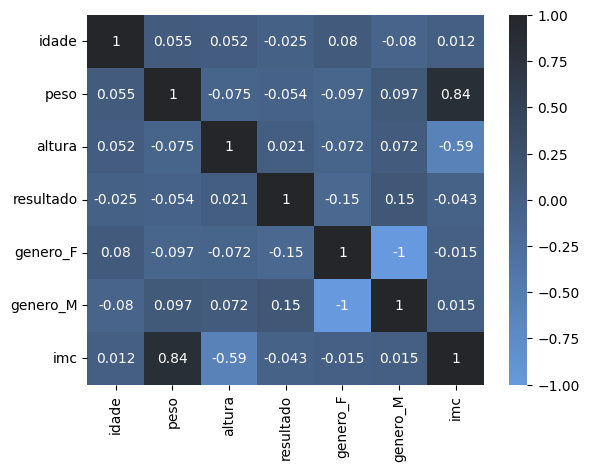

In [26]:
# Apresentar mapa de calor com correlação entre as variáveis
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap(df_exames.corr(), annot=True, cmap=cmap)


<Axes: >

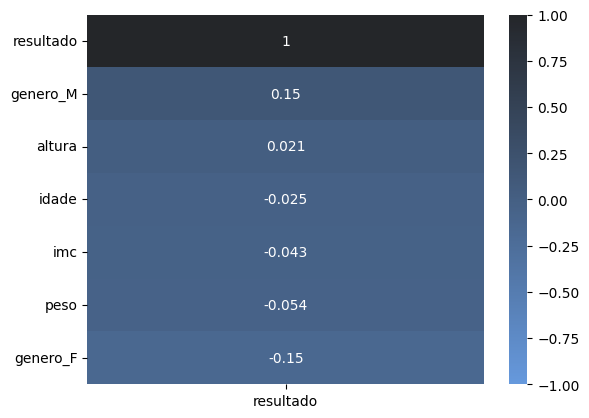

In [27]:
# Mapa de Correlação com a variável target(resultado)
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1,vmax=1,annot=True, cmap=cmap)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

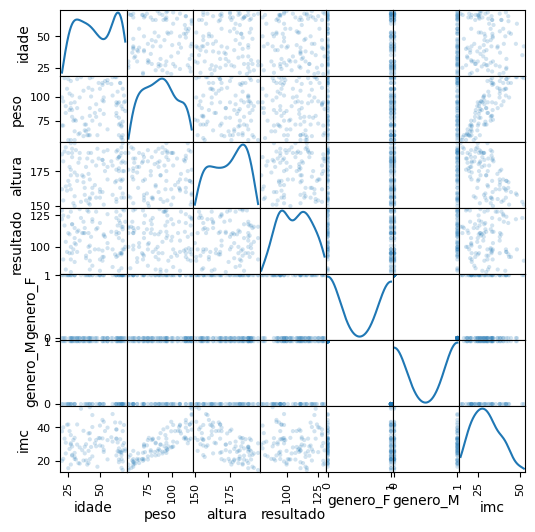

In [111]:
# Plot de Scatter (Dispersão) com Distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2,figsize=(6,6), diagonal='kde')

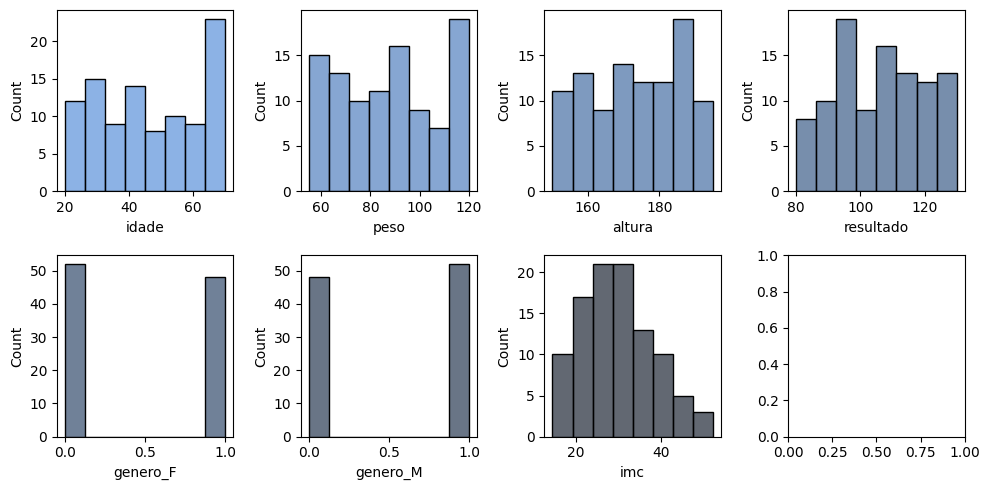

In [30]:
# Histograma de todas as variáveis
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
fig, axs = plt.subplots(2, 4, figsize=(10,5))
for i, ax in enumerate(axs.flatten()):
    if i < len(df_exames.columns):
        sns.histplot(df_exames[df_exames.columns[i]], ax=ax, kde=False, color=cmap(i / len(df_exames.columns)))

plt.tight_layout()

### Criação de Features

Criar uma nova feature chamada IMC (Índice de Massa Corporal) com base nas variáveis peso e altura

In [24]:
# IMC = peso (kg) / altura² (m)
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura'] / 100 ) ** 2))
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [25]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


Foi conduzida a análise dos gráficos de correlação e histograma para investigar a relação potencial entre o IMC e a variável alvo. Concluiu-se que, embora o IMC demonstre correlações com peso e altura, sua associação com o resultado revelou-se fraca. Nesse contexto, destacou-se a importância da engenharia de features, ressaltando a capacidade de criar novas variáveis para aprimorar o desempenho do modelo.

## Treinamento dos Modelos

### Primeiro Modelo - Sem IMC

Construção

In [37]:
X = df_exames.drop(columns=['imc', 'resultado'])
Y = df_exames['resultado']

In [41]:
# Dividir conjunto entre treinamento e teste garantindo a reprodutibilidade
X_train, X_test, y_train, y_test =train_test_split(X,Y,train_size=0.7, random_state=51)


Após realizar as importações necessárias, os dados foram preparados para a construção do primeiro modelo, excluindo a variável IMC. Os dados foram divididos em variáveis dependentes (target) e independentes (explicativa), com a remoção de colunas consideradas desnecessárias. Posteriormente, o conjunto de dados foi separado em conjuntos de treino e teste, sendo alocados 70% para treinamento e 30% para teste. Para assegurar a reprodutibilidade, foi utilizado o argumento random state. Por fim, quatro conjuntos de dados distintos foram gerados para prosseguir com as análises.

Treinamento

In [44]:
model_1 = LinearRegression().fit(X_train, y_train)

In [46]:
# Gerar predições do conjunto de testes com base no Modelo 1
y_pred = model_1.predict(X_test)
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])


O processo de treinamento implica fornecer ao modelo os dados de treinamento, compreendendo as variáveis independentes (X) e dependentes (Y). Utilizando um algoritmo de regressão linear, o modelo busca identificar padrões entre X e Y. Posteriormente, foram geradas previsões por meio do conjunto de testes, e essas previsões foram comparadas com os dados reais para avaliação de desempenho.

Métricas

In [51]:
# R2Score no conjunto de treinamento
model_1.score(X_train, y_train)

0.06218388634297234

In [53]:
# R2Score no conjunto de teste
r2_score(y_test, y_pred)

-0.13640904479106397

In [57]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.695569181179541

O R2Sore mede o quão bem o modelo explica a variação dos dados, com valores mais próximos de 1 indicando um bom ajuste. Já o MAE, calcula a diferença média entre os valores reais e os valores previstos pelo modelo. O primeiro modelo teve um baixo R2Score, e um MAE consíderavel, com um Erro Médio Absoluto de 12.69 decílitro, para mais ou para menos

### Segundo Modelo - Apenas IMC

In [58]:
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [59]:
# Dividir conjunto entre treinamento e teste
X_train, X_test, y_train, y_test =train_test_split(X,Y,train_size=0.7, random_state=51)

In [60]:
# Treinamento
model_2 = LinearRegression().fit(X_train, y_train)

In [63]:
# Gerar predição com base no modelo para o conjuto de teste
y_pred = model_2.predict(X_test)

In [68]:
# R2Score no conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806862

In [69]:
# R2Score no conjunto de teste
r2_score(y_test, y_pred)

-0.08898328562401758

In [71]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.5056514070601

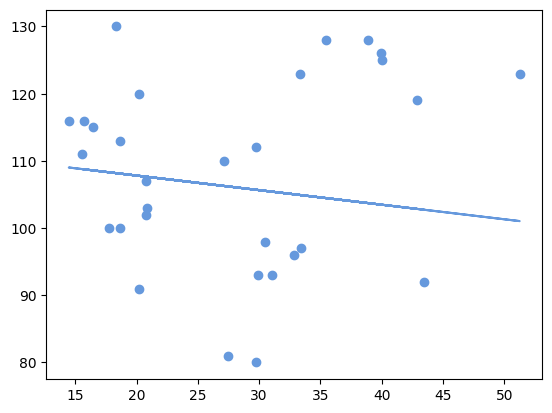

In [107]:
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='#69d')
plt.plot(X_test, y_pred, color='#69d')

## Conclusões

O primeiro modelo adotado é uma regressão linear múltipla, incorporando todas as variáveis, exceto o IMC. Já o segundo modelo, uma regressão linear simples, leva em consideração apenas o IMC. Para avaliar a eficácia de cada modelo, realizou-se uma análise de desempenho utilizando métricas como o R2Score e o erro quadrático mínimo. Além disso, examinou-se visualmente as linhas de regressão e os resíduos para aprofundar a compreensão das capacidades de cada modelo.

Os resultados indicam que o segundo modelo, com foco exclusivo no IMC como variável, apresentou um desempenho ligeiramente superior. Contudo, observou-se ainda margem para aprimoramentos futuros nos modelos.